<a href="https://colab.research.google.com/github/leonardo-91/sistemas-inteligentes/blob/main/E1_Proyecto_Final_Sistemas_Inteligentes_Fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Pontifica Universidad Javeriana**

Sistemas Inteligentes


---



**Grupo:**

1.   Edison Leonardo Neira Espitia
2.   Sergio Rairan
3.   Sebastian Herrara




---





# **Sistema inteligente para la segmentación de clientes con el fin de potencializar y optimizar la conversión de la campaña deposito financiero**



---



# **Contexto**

Una institución bancaria portuguesa, propone a través de una campaña de marketing basada en llamadas telefónica, predecir si un usuario se suscribirá a un depósito a plazos. De cada usuario intentan saber atributos como el trabajo actual, el nivel de educación, el incumplimiento financiero, etc. Actualmente, la institución realiza las llamadas sin clasificar ni priorizar clientes, como consecuencia se tiene un tiempo elevado en la labor e incomodidad en clientes que no cumplan con el perfil.



## **Objetivo**

Aumentar el número de clientes que se suscriben y al mismo tiempo eficientar la operación de la campaña de depósito financiero (CDT) a partir de estrategias orientadas a la conversión de usuarios usando cuatro técnicas de IA utilizando datos de los años 2012 - 2014 con un nivel mínimo de precisión del 80% de conversión, buscando ampliar el recaudo financiero para la compañía (Banco), posibilitando el aumento del índice de inversión y por ende el aumento de las utilidades. Esperamos analizar estos cuatro tipos de técnicas de IA por medio de Google Colabs usando Python 3.7 como leguaje de programación, y Scikit-Learn como librería de apoyo para la implementación de los diferentes algoritmos, a su vez usaremos el set de datos públicos de una institución financiera de Portugal que se encuentra alojado en Center of Machine Learning  and Intellignet system (UCI), tenemos como objetivo desarrollar este análisis en el transcurso del curso que se estima será de 3 meses.  



---



## **Desarrollo**

In [ ]:
!python --version

Python 3.7.13


Instalamos libreria para usar **Fuzzy** sobre python usando la libreria **scikit-fuzzy**

In [ ]:
!pip install scikit-fuzzy

     |████████████████████████████████| 993 kB 5.1 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=6dca7923cfab896d6c7f42e5748c11358a53f146f91eb3a672f67271414a4e57
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


**Librerías**

In [ ]:
import numpy as np
import pandas as pd
import pylab as pl
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder

**Matriz de confusión**

In [ ]:
def list_cm(cm,classes):     #función para generar de una forma más visual la matriz de confusión
    if len(cm)==2:
      cm.astype(int)
      row_0 =['','Valor','Verdadero']
      row_1 =['-',classes[0],classes[1]]
      row_2 =[classes[0],cm[0,0],cm[1,0]]
      row_3 =[classes[1],cm[0,1],cm[1,1]]
      table = zip(row_0,row_1, row_2, row_3)
      headers = ['', '', 'Valor', 'Predicho']  
      return print(tabulate(table, headers=headers, floatfmt=".0f"))
    else:
      cm.astype(int)
      row_0 =['','Valor','Verdadero','']
      row_1 =['-',classes[0],classes[1],classes[2]]
      row_2 =[classes[0],cm[0,0],cm[1,0],cm[2,0]]
      row_3 =[classes[1],cm[0,1],cm[1,1],cm[2,1]]
      row_4 =[classes[2],cm[0,2],cm[1,2],cm[2,2]]
      table = zip(row_0,row_1, row_2, row_3, row_4)
      headers = ['', '', 'Valor', 'Predicho', '']  
      return print(tabulate(table, headers=headers, floatfmt=".0f")) 

**Cargue de datos**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Ruta leo : "/content/drive/MyDrive/Maestria IA/Sistemas Inteligentes/Proyecto Final SI/Set de datos/bank-full.csv"
#Ruta Sergio : "/content/drive/MyDrive/Proyecto Final/Set de datos/bank-full.csv"
#Ruta Sebastián: "/content/drive/MyDrive/Proyecto Final/Set de datos/bank-full.csv"

df_bank = pd.read_csv("/content/drive/MyDrive/Proyecto Final/Set de datos/bank-full.csv", sep=";")

In [ ]:
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Eliminacion de variables

En este caso vamos a eliminar las variables que descartamos de acuerdo a nuestro analisis realizado

In [ ]:
df_bank.drop(inplace=True,axis=1,columns=["job","default","housing","contact","day","month","duration","campaign","pdays","poutcome"])

In [ ]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   marital    45211 non-null  object
 2   education  45211 non-null  object
 3   balance    45211 non-null  int64 
 4   loan       45211 non-null  object
 5   previous   45211 non-null  int64 
 6   y          45211 non-null  object
dtypes: int64(3), object(4)
memory usage: 2.4+ MB


In [ ]:
df_bank.balance.value_counts().sort_index()

-8019      1
-6847      1
-4057      1
-3372      1
-3313      1
          ..
 66721     1
 71188     1
 81204     2
 98417     1
 102127    1
Name: balance, Length: 7168, dtype: int64

**Limpieza y Calidad de datos**

Variable **Education**, eliminacion de registros desconocidos

In [ ]:
df_bank.education.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [ ]:
df_bank=df_bank[~df_bank.education.isin(['unknown'])]

In [ ]:
df_bank.education.value_counts()

secondary    23202
tertiary     13301
primary       6851
Name: education, dtype: int64

Variable **Previous**, eliminacion de ruido (Registros  errados)

In [ ]:
df_bank.previous.value_counts().sort_index()

0      35420
1       2656
2       2011
3       1098
4        695
5        446
6        269
7        197
8        127
9         88
10        63
11        60
12        42
13        36
14        19
15        20
16        13
17        15
18         6
19        11
20         8
21         4
22         6
23         8
24         5
25         4
26         2
27         4
28         2
29         4
30         3
32         1
35         1
37         2
38         2
40         1
41         1
51         1
55         1
58         1
275        1
Name: previous, dtype: int64

In [ ]:
df_bank=df_bank[~df_bank.previous.isin([275])]

# Implementacion Fuzzy

In [ ]:
import skfuzzy as fuzz
import random
from skfuzzy import control as ctrl

Creacion de **variables Fuzzy**

In [ ]:
age = ctrl.Antecedent(np.arange(32, 95, 1), 'age')
previous = ctrl.Antecedent(np.arange(0, 58, 1), 'previous')
balance = ctrl.Antecedent(np.arange(0, 140000, 1), 'balance')
marital = ctrl.Antecedent(np.arange(0, 4, 1), 'marital')
loan = ctrl.Antecedent(np.arange(0, 1, 0.1), 'loan')
education = ctrl.Antecedent(np.arange(0, 4, 1), 'education')
y = ctrl.Consequent(np.arange(0, 1, 0.1), 'y')

Creacion de rangos **Fuzzy** **Triangualar**

In [ ]:
age["Joven"] = fuzz.trimf(age.universe, [32,32,50])
age["Adulto"] = fuzz.trimf(age.universe, [40,55,70])
age["Adulto Mayor"] = fuzz.trimf(age.universe, [65,95,95])

previous["Bajo"] = fuzz.trimf(previous.universe, [0,0,1])
previous["Medio"] = fuzz.trimf(previous.universe, [1,6,10])
previous["Alto"] = fuzz.trimf(previous.universe, [9,58,58])

balance["Bajo"] = fuzz.trimf(balance.universe, [-8019,-8019,15000])
balance["Medio"] = fuzz.trimf(balance.universe, [10000,35000,60000])
balance["Alto"] = fuzz.trimf(balance.universe, [50000,140000,140000])

marital["Soltero"] = fuzz.trimf(marital.universe, [0,0,2])
marital["Casado"] = fuzz.trimf(marital.universe, [1,2,3])
marital["Divorciado"] = fuzz.trimf(marital.universe, [2,4,4])

loan["No"] = fuzz.trimf(loan.universe, [0,0,0.6])
loan["Si"] = fuzz.trimf(loan.universe, [0.4,1,1])

education["Primaria"] = fuzz.trimf(education.universe, [0,0,2])
education["Segundaria"] = fuzz.trimf(education.universe, [1,2,3])
education["Universitario"] = fuzz.trimf(education.universe, [2,4,4])

y["Bajo"] = fuzz.trimf(y.universe, [0,0,0.4])
y["Alto"] = fuzz.trimf(y.universe, [0.1,.45,.8])
y["Muy Alto"] = fuzz.trimf(y.universe, [.7,1,1])

Visualizamos las graficas **triangulares** de cada variables Fuzzy

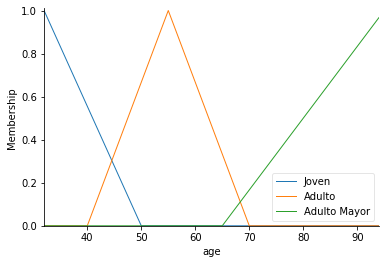

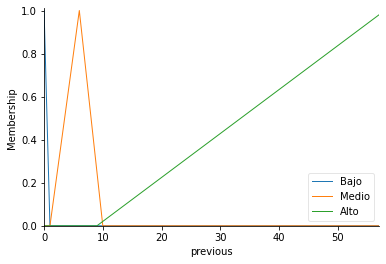

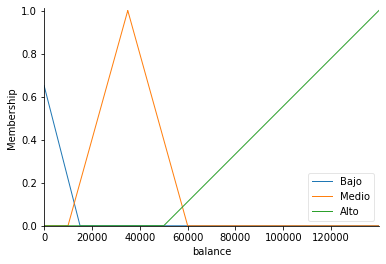

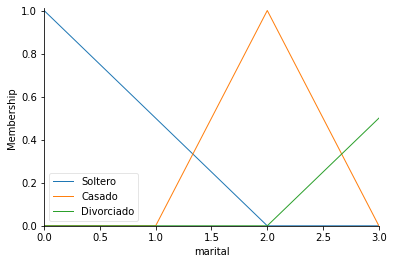

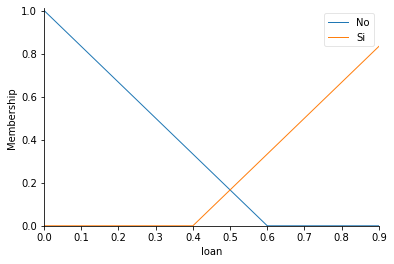

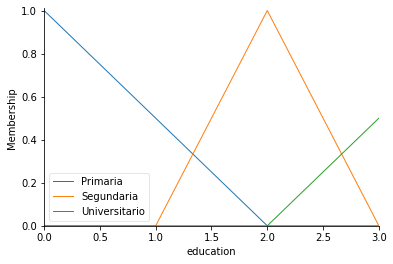

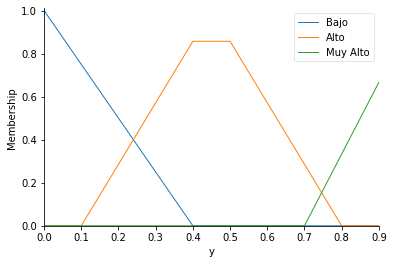

In [ ]:
age.view()
previous.view()
balance.view()
marital.view()
loan.view()
education.view()
y.view()

Creacion de las **reglas fuzzy** analizadas para nuestro ejercicio

In [ ]:
rule1 = ctrl.Rule(age['Joven'] & previous['Alto'] & balance['Alto'] & marital['Soltero'] & loan['No'] & education['Universitario'], y['Muy Alto'])
rule2 = ctrl.Rule(age['Adulto'] & previous['Alto'] & balance['Alto'] & marital['Casado'] & loan['No'] & education['Universitario'], y['Muy Alto'])
rule3 = ctrl.Rule(age['Joven'] & previous['Alto'] & balance['Alto'] & marital['Casado'] & loan['No'] & education['Universitario'], y['Muy Alto'])
rule4 = ctrl.Rule(age['Joven'] & previous['Alto'] & balance['Alto'] & marital['Soltero'] & loan['Si'] & education['Universitario'], y['Alto'])
rule5 = ctrl.Rule(age['Adulto'] & previous['Medio'] & balance['Alto'] & marital['Divorciado'] & loan['No'] & education['Segundaria'], y['Alto'])
rule6 = ctrl.Rule(age['Adulto'] & previous['Medio'] & balance['Alto'] & marital['Casado'] & loan['No'] & education['Universitario'], y['Alto'])
rule7 = ctrl.Rule(age['Joven'] & previous['Medio'] & balance['Medio'] & marital['Soltero'] & loan['No'] & education['Universitario'], y['Alto'])
rule8 = ctrl.Rule(age['Joven'] & previous['Medio'] & balance['Bajo'] & marital['Soltero'] & loan['No'] & education['Segundaria'], y['Bajo'])
rule9 = ctrl.Rule(age['Adulto'] & previous['Bajo'] & balance['Bajo'] & marital['Divorciado'] & loan['Si'] & education['Segundaria'], y['Bajo'])
rule10 = ctrl.Rule(age['Joven'] & previous['Bajo'] & balance['Bajo'] & marital['Soltero'] & loan['Si'] & education['Primaria'], y['Bajo'])
rule11 = ctrl.Rule(age['Adulto Mayor'] & previous['Medio'] & balance['Bajo'] & marital['Casado'] & loan['Si'] & education['Segundaria'], y['Bajo'])
rule12 = ctrl.Rule(age['Adulto Mayor'] & previous['Medio'] & balance['Medio'] & marital['Casado'] & loan['No'] & education['Segundaria'], y['Alto'])
rule13 = ctrl.Rule(age['Adulto Mayor'] & previous['Medio'] & balance['Alto'] & marital['Casado'] & loan['No'] & education['Universitario'], y['Muy Alto'])
rule14 = ctrl.Rule(age['Adulto Mayor'] & previous['Alto'] & balance['Alto'] & marital['Divorciado'] & loan['No'] & education['Universitario'], y['Alto'])
rule15 = ctrl.Rule(age['Adulto'] & previous['Bajo'] & balance['Medio'] & marital['Soltero'] & loan['No'] & education['Universitario'], y['Alto'])
rule16 = ctrl.Rule(age['Joven'] & previous['Bajo'] & balance['Medio'] & marital['Casado'] & loan['No'] & education['Universitario'], y['Alto'])
rule17 = ctrl.Rule(age['Adulto'] & previous['Bajo'] & balance['Bajo'] & marital['Soltero'] & loan['No'] & education['Universitario'], y['Alto'])

In [ ]:
# rule1 = ctrl.Rule(age['Joven'] & balance['Bajo'] & loan['No'], y['Bajo'])
# rule2 = ctrl.Rule(age['Adulto'] & balance['Bajo'] & loan['No'], y['Bajo'])
# rule3 = ctrl.Rule(age['Adulto Mayor'] & balance['Bajo'] & loan['No'], y['Bajo'])
# rule4 = ctrl.Rule(age['Joven'] & balance['Medio'] & loan['No'], y['Alto'])
# rule5 = ctrl.Rule(age['Adulto'] & balance['Medio'] & loan['No'], y['Alto'])
# rule6 = ctrl.Rule(age['Adulto Mayor'] & balance['Medio'] & loan['No'], y['Muy Alto'])
# rule7 = ctrl.Rule(age['Joven'] & balance['Alto'] & loan['No'], y['Alto'])
# rule8 = ctrl.Rule(age['Adulto'] & balance['Alto'] & loan['No'], y['Muy Alto'])
# rule9 = ctrl.Rule(age['Adulto Mayor'] & balance['Alto'] & loan['No'], y['Muy Alto'])
# rule10 = ctrl.Rule(age['Joven'] & balance['Bajo'] & loan['Si'], y['Bajo'])
# rule11 = ctrl.Rule(age['Adulto'] & balance['Bajo'] & loan['Si'], y['Bajo'])
# rule12 = ctrl.Rule(age['Adulto Mayor'] & balance['Bajo'] & loan['Si'], y['Bajo'])
# rule13 = ctrl.Rule(age['Joven'] & balance['Medio'] & loan['Si'], y['Bajo'])
# rule14 = ctrl.Rule(age['Adulto'] & balance['Medio'] & loan['Si'], y['Bajo'])
# rule15 = ctrl.Rule(age['Adulto Mayor'] & balance['Medio'] & loan['Si'], y['Bajo'])
# rule16 = ctrl.Rule(age['Joven'] & balance['Alto'] & loan['Si'], y['Alto'])
# rule17 = ctrl.Rule(age['Adulto'] & balance['Alto'] & loan['Si'], y['Alto'])
# rule18 = ctrl.Rule(age['Adulto Mayor'] & balance['Alto'] & loan['Si'], y['Alto'])

Agregamos las reglas a nuestro algoritmo

In [ ]:
# validate_ctrl = ctrl.ControlSystem([rule1, rule2, rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18])
# validate_ctrl = ctrl.ControlSystem([rule1, rule2, rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17])
# rules = [rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25, rule26, rule27, rule28, rule29, rule30, rule31, rule32, rule33, rule34, rule35, rule36, rule37, rule38, rule39, rule40, rule41, rule42, rule43, rule44, rule45, rule46, rule47, rule48, rule49, rule50, rule51, rule52, rule53, rule54, rule55, rule56, rule57, rule58, rule59, rule60, rule61, rule62, rule63, rule64, rule65, rule66, rule67, rule68, rule69, rule70, rule71, rule72, rule73, rule74, rule75, rule76, rule77, rule78, rule79, rule80, rule81, rule82, rule83, rule84, rule85, rule86, rule87, rule88, rule89, rule90, rule91, rule92, rule93, rule94, rule95, rule96, rule97, rule98, rule99, rule100, rule101, rule102, rule103, rule104, rule105, rule106, rule107, rule108, rule109, rule110, rule111, rule112, rule113, rule114, rule115, rule116, rule117, rule118, rule119, rule120, rule121, rule122, rule123, rule124, rule125, rule126, rule127, rule128, rule129, rule130, rule131, rule132, rule133, rule134, rule135, rule136, rule137, rule138, rule139, rule140, rule141, rule142, rule143, rule144, rule145, rule146, rule147, rule148, rule149, rule150, rule151, rule152, rule153, rule154, rule155, rule156, rule157, rule158, rule159, rule160, rule161, rule162, rule163, rule164, rule165, rule166, rule167, rule168, rule169, rule170, rule171, rule172, rule173, rule174, rule175, rule176, rule177, rule178, rule179, rule180, rule181, rule182, rule183, rule184, rule185, rule186, rule187, rule188, rule189, rule190, rule191, rule192, rule193, rule194, rule195, rule196, rule197, rule198, rule199, rule200, rule201, rule202, rule203, rule204, rule205, rule206, rule207, rule208, rule209, rule210, rule211, rule212, rule213, rule214, rule215, rule216, rule217, rule218, rule219, rule220, rule221, rule222, rule223, rule224, rule225, rule226, rule227, rule228, rule229, rule230, rule231, rule232, rule233, rule234, rule235, rule236, rule237, rule238, rule239, rule240, rule241, rule242, rule243, rule244, rule245, rule246, rule247, rule248, rule249, rule250, rule251, rule252, rule253, rule254, rule255, rule256, rule257, rule258, rule259, rule260, rule261, rule262, rule263, rule264, rule265, rule266, rule267, rule268, rule269, rule270, rule271, rule272, rule273, rule274, rule275, rule276, rule277, rule278, rule279, rule280, rule281, rule282, rule283, rule284, rule285, rule286, rule287, rule288, rule289, rule290, rule291, rule292, rule293, rule294, rule295, rule296, rule297, rule298, rule299, rule300, rule301, rule302, rule303, rule304, rule305, rule306, rule307, rule308, rule309, rule310, rule311, rule312, rule313, rule314, rule315, rule316, rule317, rule318, rule319, rule320, rule321, rule322, rule323, rule324, rule325, rule326, rule327, rule328, rule329, rule330, rule331, rule332, rule333, rule334, rule335, rule336, rule337, rule338, rule339, rule340, rule341, rule342, rule343, rule344, rule345, rule346, rule347, rule348, rule349, rule350, rule351, rule352, rule353, rule354, rule355, rule356, rule357, rule358, rule359, rule360, rule361, rule362, rule363, rule364, rule365, rule366, rule367, rule368, rule369, rule370, rule371, rule372, rule373, rule374, rule375, rule376, rule377, rule378, rule379, rule380, rule381, rule382, rule383, rule384, rule385, rule386, rule387, rule388, rule389, rule390, rule391, rule392, rule393, rule394, rule395, rule396, rule397, rule398, rule399, rule400, rule401, rule402, rule403, rule404, rule405, rule406, rule407, rule408, rule409, rule410, rule411, rule412, rule413, rule414, rule415, rule416, rule417, rule418, rule419, rule420, rule421, rule422, rule423, rule424, rule425, rule426, rule427, rule428, rule429, rule430, rule431, rule432, rule433, rule434, rule435, rule436, rule437, rule438, rule439, rule440, rule441, rule442, rule443, rule444, rule445, rule446, rule447, rule448, rule449, rule450, rule451, rule452, rule453, rule454, rule455, rule456, rule457, rule458, rule459, rule460, rule461, rule462, rule463, rule464, rule465, rule466, rule467, rule468, rule469, rule470, rule471, rule472, rule473, rule474, rule475, rule476, rule477, rule478, rule479, rule480, rule481, rule482, rule483, rule484, rule485, rule486]
rules = [rule1, rule2, rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17]
validate_ctrl = ctrl.ControlSystem(rules)
validate_simulator = ctrl.ControlSystemSimulation(validate_ctrl)

Ejecutamos la regla con el 1 registro del dataframe

Funciones de conversion de variables a numericas acorde al rango

In [ ]:
def randomBetweenMarital(marital):
  a,b=0,0
  if marital == 'single':
    a,b=0,2
  elif marital=='married':
    a,b=1,3
  else:
    a,b=2,4
  return a+random.random()*(b-a) 

In [ ]:
def randomBetweenLoan(loan):
  a,b=0,0
  if loan == 'no':
    a,b=0,0.6
  else:
    a,b=0.4,1
  return a+random.random()*(b-a) 

In [ ]:
def randomBetweenEducation(edication):
  a,b=0,0
  if edication == 'primary':
    a,b=0,2
  elif edication=='secondary':
    a,b=1,3
  else:
    a,b=2,4
  return a+random.random()*(b-a) 

In [ ]:
randomBetweenEducation(df_bank.head(1).education[0])

3.750595485663988

In [ ]:
#58,2143,0.31,0,1.7,3.8

In [ ]:
df_bank = df_bank.reset_index()
df_bank.shape

(43353, 8)

In [ ]:
df_bank.loc[[100]]

,index,age,marital,education,balance,loan,previous,y
100,110,29,divorced,secondary,31,no,0,no


In [ ]:
row = 100

In [ ]:
validate_simulator.input['age'] = df_bank.iloc[[row]].age[row]
validate_simulator.input['balance'] = df_bank.iloc[[row]].balance[row]
validate_simulator.input['loan'] = randomBetweenLoan(df_bank.iloc[[row]].loan[row])
validate_simulator.input['previous'] = df_bank.iloc[[row]].previous[row]
validate_simulator.input['marital'] = randomBetweenMarital(df_bank.iloc[[row]].marital[row])
validate_simulator.input['education'] = randomBetweenEducation(df_bank.iloc[[row]].education[row])

In [ ]:
# validate_simulator.input['age']=58
# validate_simulator.input['balance']=2143
# validate_simulator.input['loan']=0.3
# validate_simulator.input['previous']=0
# validate_simulator.input['marital']=1.7
# validate_simulator.input['education']=3.8

Revisamos el resultado del algoritmo Fuzzy

In [ ]:
results = []
no_results = []
for row in range(len(df_bank)):
  try:
    validate_simulator.input['age'] = df_bank.iloc[[row]].age[row]
    validate_simulator.input['balance'] = df_bank.iloc[[row]].balance[row]
    validate_simulator.input['loan'] = randomBetweenLoan(df_bank.iloc[[row]].loan[row])
    validate_simulator.input['previous'] = df_bank.iloc[[row]].previous[row]
    validate_simulator.input['marital'] = randomBetweenMarital(df_bank.iloc[[row]].marital[row])
    validate_simulator.input['education'] = randomBetweenEducation(df_bank.iloc[[row]].education[row])

    validate_simulator.compute()
    results.append({"y": df_bank.iloc[[row]].y[row], "fuzzy": validate_simulator.output['y']})
  except Exception:
    no_results.append(row)

print(results)
print(no_results)

[{'y': 'no', 'fuzzy': 0.45}, {'y': 'no', 'fuzzy': 0.19340996168582375}, {'y': 'no', 'fuzzy': 0.45}, {'y': 'no', 'fuzzy': 0.4499999999999999}, {'y': 'no', 'fuzzy': 0.17488040972266344}, {'y': 'no', 'fuzzy': 0.19407417682925002}, {'y': 'no', 'fuzzy': 0.1967882060975841}, {'y': 'no', 'fuzzy': 0.18725755442668557}, {'y': 'no', 'fuzzy': 0.17870370370370367}, {'y': 'no', 'fuzzy': 0.45000000000000007}, {'y': 'no', 'fuzzy': 0.19435108127752362}, {'y': 'no', 'fuzzy': 0.189222192520044}, {'y': 'no', 'fuzzy': 0.18721945421197309}, {'y': 'no', 'fuzzy': 0.19193431473824138}, {'y': 'no', 'fuzzy': 0.19377190807227831}, {'y': 'no', 'fuzzy': 0.17263159079085394}, {'y': 'no', 'fuzzy': 0.19287025373269556}, {'y': 'no', 'fuzzy': 0.18255563039135128}, {'y': 'no', 'fuzzy': 0.45000000000000007}, {'y': 'no', 'fuzzy': 0.18819418818496733}, {'y': 'no', 'fuzzy': 0.4499999999999968}, {'y': 'no', 'fuzzy': 0.1920786469053277}, {'y': 'no', 'fuzzy': 0.194456291067482}, {'y': 'no', 'fuzzy': 0.18566787855375935}, {'y':

In [ ]:
print(len(results))
print(len(no_results))

11149
32204


In [ ]:
cont_no_no = 0
cont_no_yes = 0
cont_yes_no = 0
cont_yes_yes = 0
for r in results:
  if r["y"] == "no" and r["fuzzy"] < 0.4:
    cont_no_no += 1
  if r["y"] == "no" and r["fuzzy"] > 0.4:
    cont_no_yes += 1
  if r["y"] == "yes" and r["fuzzy"] < 0.4:
    cont_yes_no += 1
  if r["y"] == "yes" and r["fuzzy"] > 0.4:
    cont_yes_yes += 1

In [ ]:
print(cont_no_no, cont_no_yes)
print(cont_yes_no, cont_yes_yes)

6740 3252
826 331


Graficamos el resultado

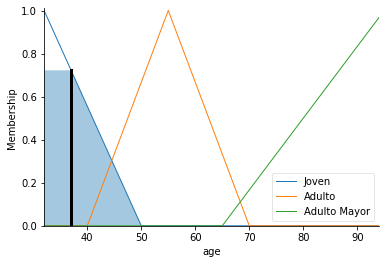

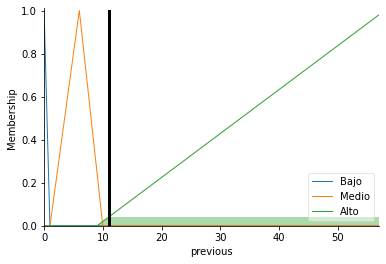

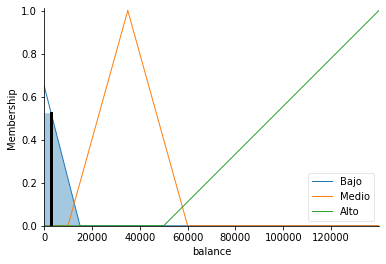

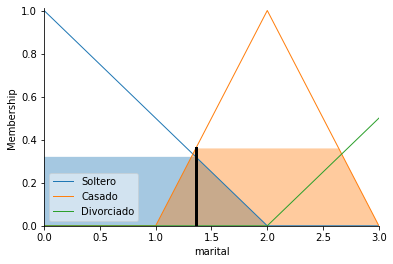

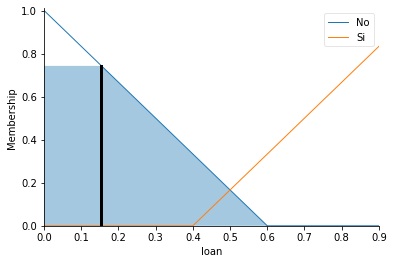

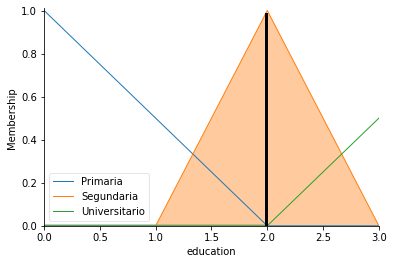

In [ ]:
age.view(sim=validate_simulator)
previous.view(sim=validate_simulator)
balance.view(sim=validate_simulator)
marital.view(sim=validate_simulator)
loan.view(sim=validate_simulator)
education.view(sim=validate_simulator)


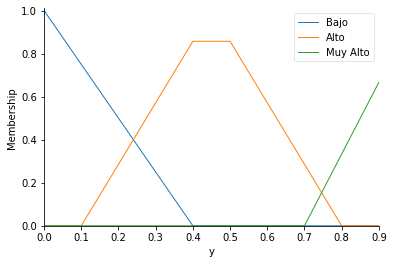

In [ ]:
y.view(sim=validate_simulator)